## Set up libraries

In [3]:
import os

import numpy as np  
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import cufflinks as cf
#os.getcwd()

###### Read Big Mac raw data

In [4]:
big_mac_raw_df=pd.read_csv('big-mac-full-index.csv', parse_dates=['date'])

###### Display data basic info

In [5]:
big_mac_raw_df.info()

In [6]:
big_mac_raw_df.head(5)

In [7]:
big_mac_df=big_mac_raw_df[(big_mac_raw_df['date'] > '2011-12-31 01:00:00')]
big_mac_df['date'].value_counts().keys().sort_values(ascending=False)

DatetimeIndex(['2018-01-01', '2017-07-01', '2017-01-01', '2016-07-01',
               '2016-01-01', '2015-07-01', '2015-01-01', '2014-07-01',
               '2014-01-01', '2013-07-01', '2013-01-01', '2012-07-01',
               '2012-01-01'],
              dtype='datetime64[ns]', freq=None)

In [8]:
big_mac_df['name'].value_counts(dropna=False)

Uruguay           13
India             13
Canada            13
Russia            13
Malaysia          13
United States     13
Colombia          13
UAE               13
Turkey            13
Australia         13
Hong Kong         13
Czech Republic    13
Saudi Arabia      13
New Zealand       13
Sri Lanka         13
Switzerland       13
South Africa      13
Euro area         13
Israel            13
Japan             13
Brazil            13
Chile             13
Britain           13
Thailand          13
Denmark           13
Egypt             13
South Korea       13
Taiwan            13
Norway            13
Philippines       13
Ukraine           13
Argentina         13
Indonesia         13
Hungary           13
Pakistan          13
China             13
Poland            13
Sweden            13
Singapore         13
Mexico            13
Peru              12
Costa Rica        12
Vietnam            8
Name: name, dtype: int64

In [9]:
countries_list= big_mac_df['name'].value_counts(dropna=False)[big_mac_df['name'].value_counts(dropna=False)==13].keys().values
print(countries_list)

['Uruguay' 'India' 'Canada' 'Russia' 'Malaysia' 'United States' 'Colombia'
 'UAE' 'Turkey' 'Australia' 'Hong Kong' 'Czech Republic' 'Saudi Arabia'
 'New Zealand' 'Sri Lanka' 'Switzerland' 'South Africa' 'Euro area'
 'Israel' 'Japan' 'Brazil' 'Chile' 'Britain' 'Thailand' 'Denmark' 'Egypt'
 'South Korea' 'Taiwan' 'Norway' 'Philippines' 'Ukraine' 'Argentina'
 'Indonesia' 'Hungary' 'Pakistan' 'China' 'Poland' 'Sweden' 'Singapore'
 'Mexico']


In [10]:
#get rid of countries that did not appear all the time
big_mac_df = big_mac_df[big_mac_df['name'].isin(countries_list)]
#now we have 40 countries data for 13 periods
big_mac_df = big_mac_df.drop(big_mac_df.columns[range(7,19)], axis='columns')
#now we get rid of unneccesary columns
big_mac_df.head(5)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
554,2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084
555,2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606
556,2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560
557,2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670
558,2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940


In [11]:
#set index so that we can find reference american price for that time
big_mac_df.set_index(['date'], inplace=True)
big_mac_df.head(5)

,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
date,,,,,,
2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084
2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606
2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560
2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670
2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940


In [12]:
big_mac_df['reference_price']=big_mac_df[big_mac_df['name']=='United States'].local_price

In [13]:
big_mac_df['valuation']=(big_mac_df['reference_price']-big_mac_df['dollar_price'])/big_mac_df['reference_price']
big_mac_df.head(5)

,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,reference_price,valuation
date,,,,,,,,
2012-01-01,ARE,AED,UAE,12.00,3.673000,3.267084,4.19722,0.221608
2012-01-01,ARG,ARS,Argentina,20.00,4.313500,4.636606,4.19722,-0.104685
2012-01-01,AUS,AUD,Australia,4.80,0.972337,4.936560,4.19722,-0.176150
2012-01-01,BRA,BRL,Brazil,10.25,1.805000,5.678670,4.19722,-0.352960
2012-01-01,CAN,CAD,Canada,4.73,1.020950,4.632940,4.19722,-0.103812


In [14]:
big_mac_df.reset_index(inplace=True)
big_mac_df_pivot = big_mac_df.pivot(index='date', columns='name', values='valuation')

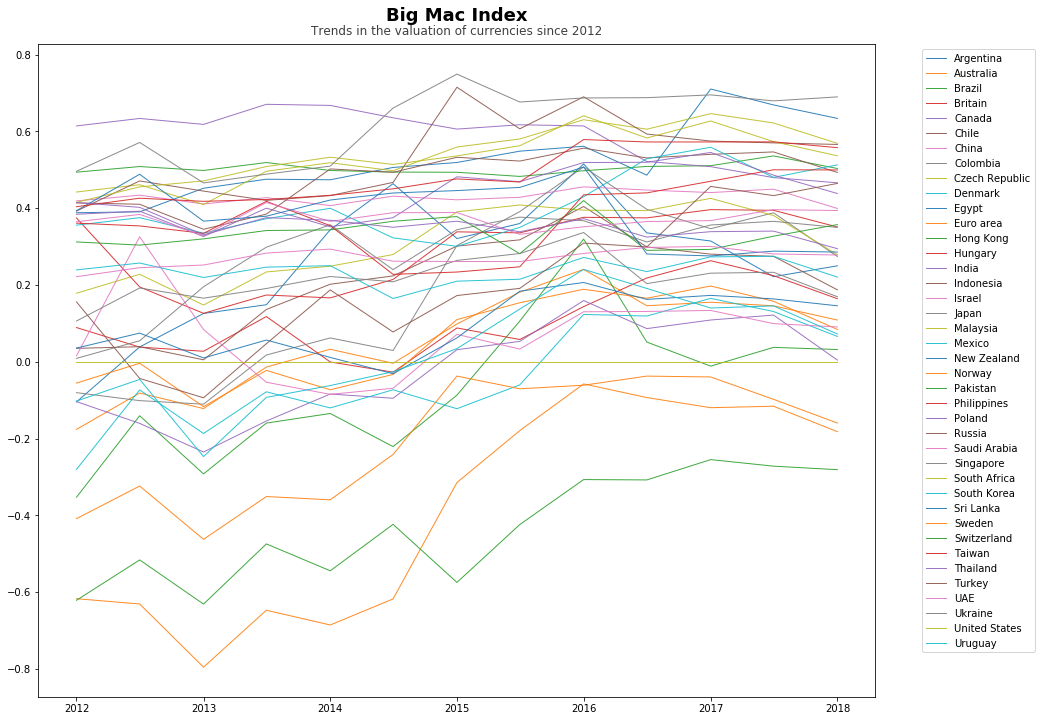

In [15]:
fig, ax = plt.subplots(figsize=(15,12))

for column in big_mac_df_pivot:
    plt.plot(big_mac_df_pivot.index, big_mac_df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

ax.text(x=0.5, y=1.03, s='Big Mac Index', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Trends in the valuation of currencies since 2012', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
          
h,l = ax.get_legend_handles_labels()
ax.legend(h,l, bbox_to_anchor=(1.05,1))

plt.show()



In [16]:
#To Do:
#Plotly graphs
#Group by regions
#PCA and then clustering
#create multi-dimensional df (indexed by date and country)
#volList = Ser.rolling().std(ddof=0)

In [98]:
#big_mac_df.set_index(['name','date'], inplace=True)
#big_mac_df.reset_index(inplace=True)
#big_mac_df.head(5)

,,iso_a3,currency_code,local_price,dollar_ex,dollar_price,reference_price,valuation
name,date,,,,,,,
UAE,2012-01-01,ARE,AED,12.00,3.673000,3.267084,4.19722,0.221608
Argentina,2012-01-01,ARG,ARS,20.00,4.313500,4.636606,4.19722,-0.104685
Australia,2012-01-01,AUS,AUD,4.80,0.972337,4.936560,4.19722,-0.176150
Brazil,2012-01-01,BRA,BRL,10.25,1.805000,5.678670,4.19722,-0.352960
Canada,2012-01-01,CAN,CAD,4.73,1.020950,4.632940,4.19722,-0.103812


In [103]:
big_mac_stats = pd.DataFrame([[country, big_mac_df.loc[country]['valuation'].mean(), big_mac_df.loc[country]['valuation'].std()] 
                 for country in big_mac_df.index.unique(level='name')])
big_mac_stats.columns = ['country', 'index mean', "index std-dev"]
big_mac_stats.set_index('country', inplace=True)
big_mac_stats.head()

,index mean,index std-dev
country,,
UAE,0.270652,0.022845
Argentina,0.256470,0.170815
Australia,0.054657,0.127075
Brazil,-0.065681,0.180833
Canada,-0.020646,0.125687


In [111]:
#cheapest_mean=big_mac_stats['index mean'].nlargest(5)
#(cheapest_mean+most_unstable).index.values

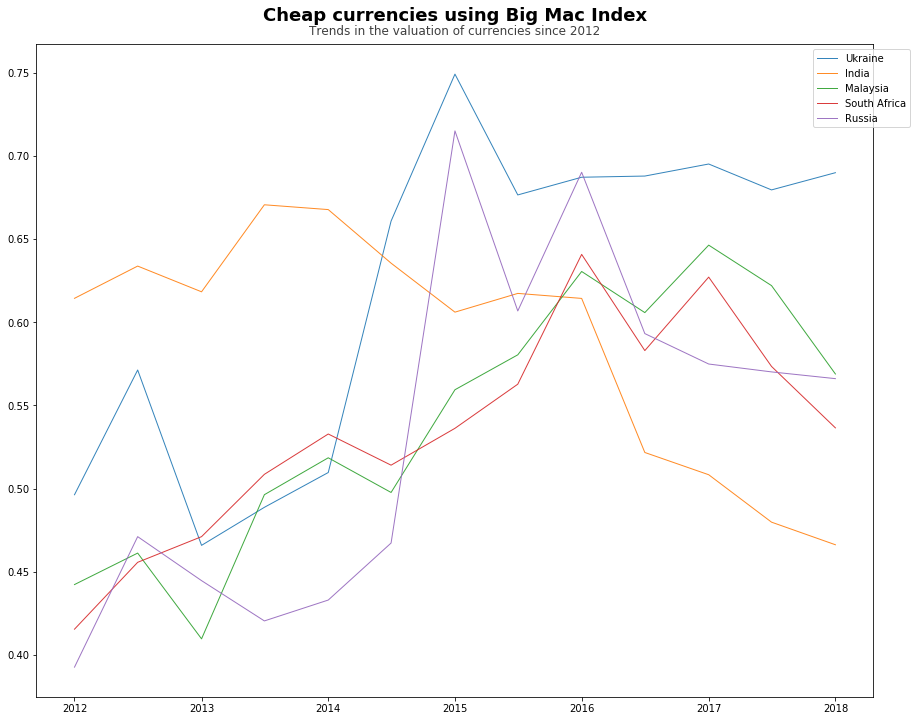

In [130]:
fig, ax = plt.subplots(figsize=(15,12))

for column in (big_mac_stats['index mean'].nlargest(5)).index.values:
    plt.plot(big_mac_df_pivot.index, big_mac_df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

ax.text(x=0.5, y=1.03, s='Cheap currencies using Big Mac Index', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Trends in the valuation of currencies since 2012', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
          
h,l = ax.get_legend_handles_labels()
ax.legend(h,l, bbox_to_anchor=(1.05,1))

plt.show()

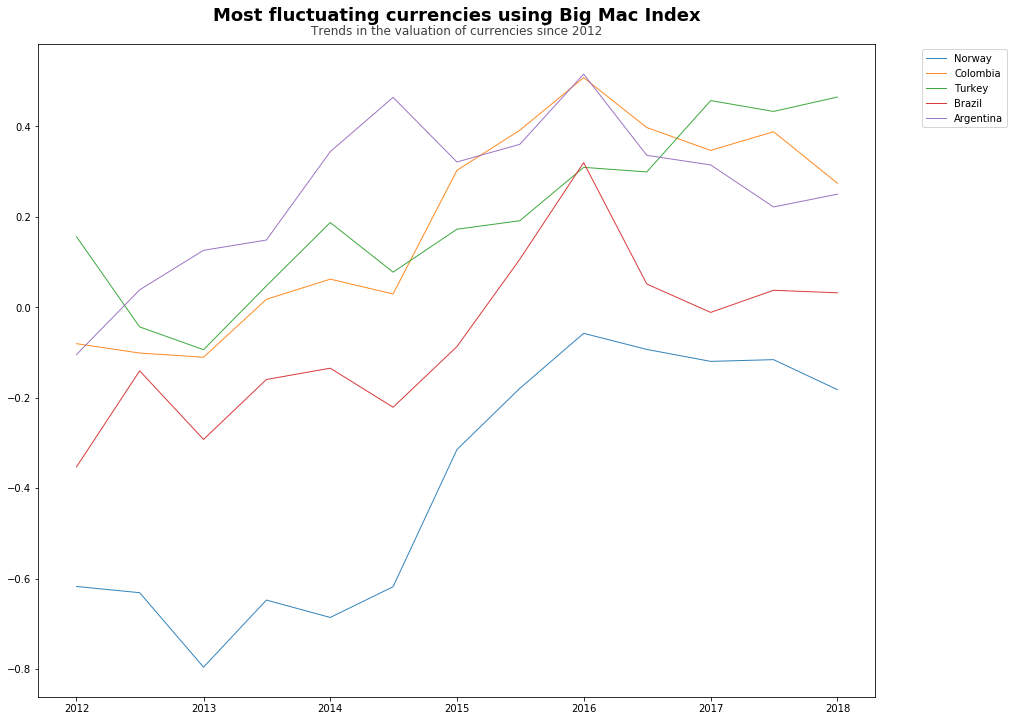

In [129]:
fig, ax = plt.subplots(figsize=(15,12))

for column in (big_mac_stats['index std-dev'].nlargest(5)).index.values:
    plt.plot(big_mac_df_pivot.index, big_mac_df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

ax.text(x=0.5, y=1.03, s='Most fluctuating currencies using Big Mac Index', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s='Trends in the valuation of currencies since 2012', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
          
h,l = ax.get_legend_handles_labels()
ax.legend(h,l, bbox_to_anchor=(1.05,1))

plt.show()